<h1 style="font-size:30px;">Alpha Channel</h1>

The alpha channel determines the transparency of a color. It's the fourth channel of an image that has pixel intensities ranging from **0-255**. **0** represents full transparency, **255** represents full opacity and intermediate values provide translucency. Certain file types support an alpha channel and one common file type is the 'PNG' file type. In this notebook, we will look at the alpha channel from an existing `.png` file and learn how to create the alpha mask for images that do not contain an alpha channel. 

![Feature-image-02-04](https://opencv.org/wp-content/uploads/2021/08/c0-m2-feature-image-04.png)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/f8ae3j0nbrflife/AAAy-WwcREtWOGgoEbFLDPANa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

# 1. Inspect the Alpha Channel from a PNG image
In this section we will read a PNG file that contains an alpha channel. We will split the channels and inspect them individually.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />


### <font color="green">OpenCV Documentation</font>

[**`split()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Read PNG image and split channels</font>

(2436, 2623, 4)


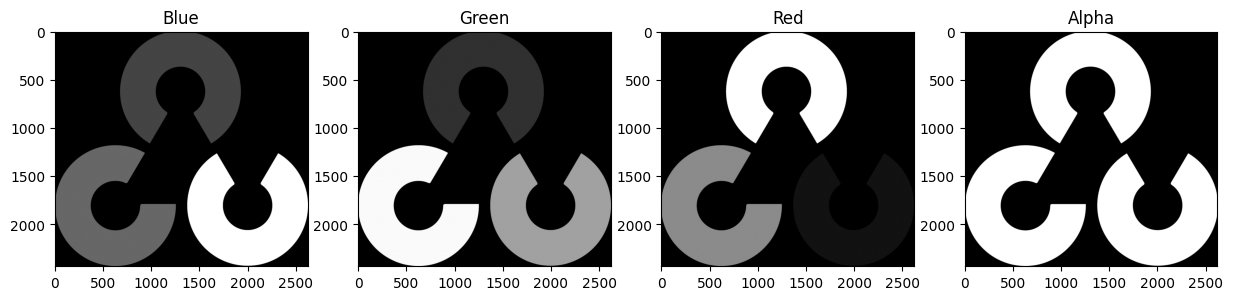

In [2]:
# Read the PNG image using: cv2.IMREAD_UNCHANGED to retain the alpha channel.
img = cv2.imread('opencv_logo.png', cv2.IMREAD_UNCHANGED)

print(img.shape)

# Split the channels.
b, g, r, a = cv2.split(img)

# Display eazch of the channels.
plt.figure(figsize = (15,15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha');

# 2. Create a PNG transparent file from a JPG file
The standard JPG file format does not support an alpha channel. Let's see how we can transform a JPG image to include an alpha channel and then save it as a PNG file. This is very useful for creating transparent logos or watermarks.

## 2.1 Read a JPG Image and Convert to Grayscale
In this section, we are going to show you how to add an alpha channel to a JPG image. For instructional purposes, we have added a light green marker to the JPG image to visually demonstrate the difference between a JPG version of the image and the PNG version.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">OpenCV Documentation</font>

[**`cvtColor()`**](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Shape of the color image:  (640, 640, 3)


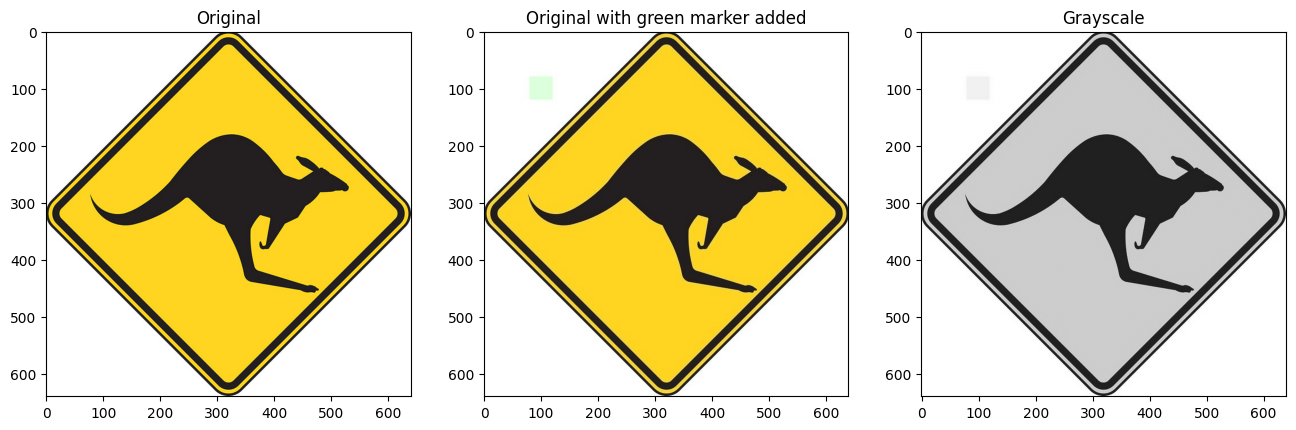

In [3]:
# Read the original and modified JPG images of the kangaroo sign.
img_kang_org = cv2.imread('kangaroo.jpg',cv2.IMREAD_COLOR)
img_kang = cv2.imread('kangaroo_sign_with_green_marker.jpg',cv2.IMREAD_COLOR)

# For reference: Code used to add light green marker to original image of the kangaroo sign.
# img_kang_org[80:120,80:120,0] = 220
# img_kang_org[80:120,80:120,1] = 255
# img_kang_org[80:120,80:120,2] = 220
# cv2.imwrite('kangaroo_sign_with_green_marker.jpg', img_kang_org)

# Print the image shapes to verify the channels.
print('Shape of the color image: ', img_kang.shape)

# Convert the image to gray scale.
img_kang_gray = cv2.cvtColor(img_kang, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (16,10))
plt.subplot(131); plt.imshow(img_kang_org[:, :, ::-1]); plt.title('Original')
plt.subplot(132); plt.imshow(img_kang[:, :, ::-1]);     plt.title('Original with green marker added')
plt.subplot(133); plt.imshow(img_kang_gray);            plt.title('Grayscale');

## 2.2 Create a Binary Mask
The first step in creating an alpha channel is to first create a binary mask for the image. The mask itself becomes the alpha channel. In this case, the white region around the sign is the area we want to be transparent. So we need to create a mask that is black (0) for the region around the sign and white (255) everywhere else.  

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">OpenCV Documentation</font>

[**`threshold()`**](https://docs.opencv.org/4.5.2/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Create inverse binary mask</font>

Inverse Mask (full) at (100,100):  0
Inverse Mask (semi) at (100,100):  55


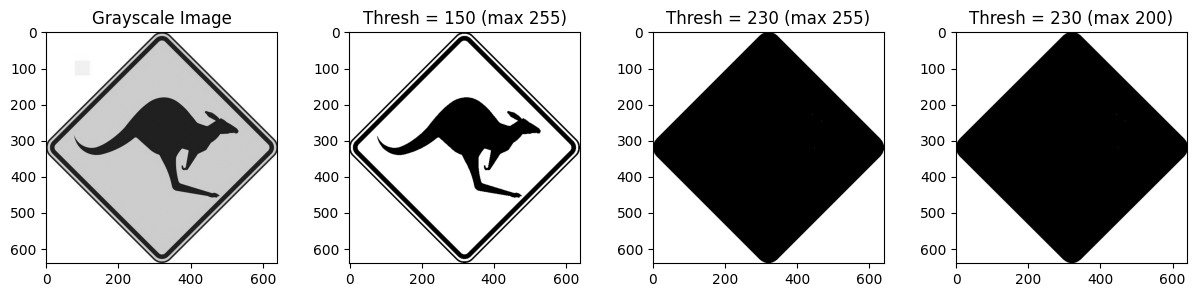

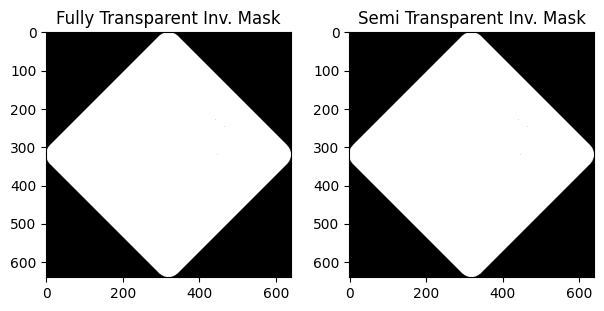

In [4]:
ret1, thresh1 = cv2.threshold(img_kang_gray, 150, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(img_kang_gray, 230, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(img_kang_gray, 230, 200, cv2.THRESH_BINARY)  # Note max value of mask is set to 200

kang_inv_mask_full = cv2.bitwise_not(thresh2)  # Fully transparent
kang_inv_mask_semi = cv2.bitwise_not(thresh3)  # Semi-transparent (due to max value of thresh3 = 200)

# Print the pixel itensity of the inverted binary masks at the location (100,100).
print('Inverse Mask (full) at (100,100): ', kang_inv_mask_full[100,100])
print('Inverse Mask (semi) at (100,100): ', kang_inv_mask_semi[100,100])

plt.figure(figsize = (15, 3))
plt.subplot(141); plt.imshow(img_kang_gray);  plt.title('Grayscale Image')
plt.subplot(142); plt.imshow(thresh1); plt.title('Thresh = 150 (max 255)')
plt.subplot(143); plt.imshow(thresh2); plt.title('Thresh = 230 (max 255)')
plt.subplot(144); plt.imshow(thresh3); plt.title('Thresh = 230 (max 200)')

plt.figure(figsize = (15, 7))
plt.subplot(245); plt.imshow(kang_inv_mask_full); plt.title('Fully Transparent Inv. Mask')
plt.subplot(246); plt.imshow(kang_inv_mask_semi); plt.title('Semi Transparent Inv. Mask');

The fully transparent mask and semi transparent masks above look identical, but this is due to the plotting limitations when using a grayscale color map with matplotlib. The pixel intensity in the black region of the fully transparent mask is equal to zero as expected. However, the pixel intensity of the black region in the semi transparent mask is actually equal to 55, because the thresholded image for this case had a maximum value of 200 and when we created the inverted mask with the `bitwise_not(thresh3)` function, the black region then became 55.

## 2.3 Add the Alpha Channel to the Image

We will now use the **`merge()`** and **`split()`** functions along with the mask to create the alpha channel.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">OpenCV Documentation</font>
[**`split()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a)
[**`merge()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Create fully transparent PNG</font>

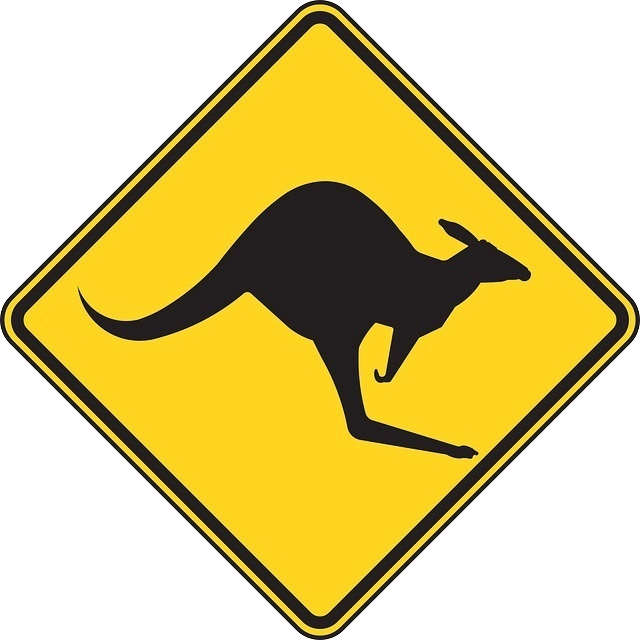

In [6]:
# Split the color channels from the original image.
bk, gk, rk = cv2.split(img_kang)

# Add the "mask" as the 4th channel.
mat = [bk, gk, rk, kang_inv_mask_full]

# Use the merge() function to create a single multi-channel array.
kangaroo_transparent = cv2.merge(mat)

# Save the transparent image as a PNG file to preserve the alpha channel.
cv2.imwrite('kangaroo_alpha_full.png', kangaroo_transparent)

# Display the PNG file we just created.
Image(filename = "kangaroo_alpha_full.png", width = '300')

### <font style="color:rgb(50,120,230)">Transparent Results</font>

Notice that the light green square in the upper left corner of the image is now gone. The alpha channel is masking it, effectively making the image transparent.

### <font style="color:rgb(50,120,230)">Create semi transparent PNG</font>

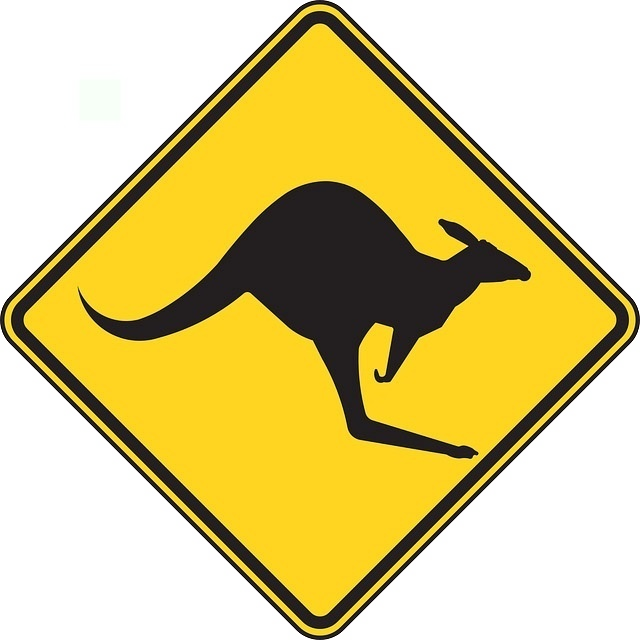

In [7]:
# Split the color channels from the original image.
bk, gk, rk = cv2.split(img_kang)

# Add the "mask" as the 4th channel.
mat = [bk, gk, rk, kang_inv_mask_semi]

# Use the merge() function to create a single multi-channel array.
kangaroo_semi = cv2.merge(mat)

# Save the transparent image as a PNG file to preserve the alpha channel.
cv2.imwrite('kangaroo_alpha_semi.png', kangaroo_semi)

# Display the PNG file we just created.
Image(filename = "kangaroo_alpha_semi.png", width = '300')

### <font style="color:rgb(50,120,230)">Semi Transparent Results</font>

Looking carefully, we can notice that the light green square in the upper left corner of the image is still somewhat visible. In this case the alpha channel has made the background only semi transparent.

## 2.4 Inspect the Channels of the fully transparent PNG file we just Created

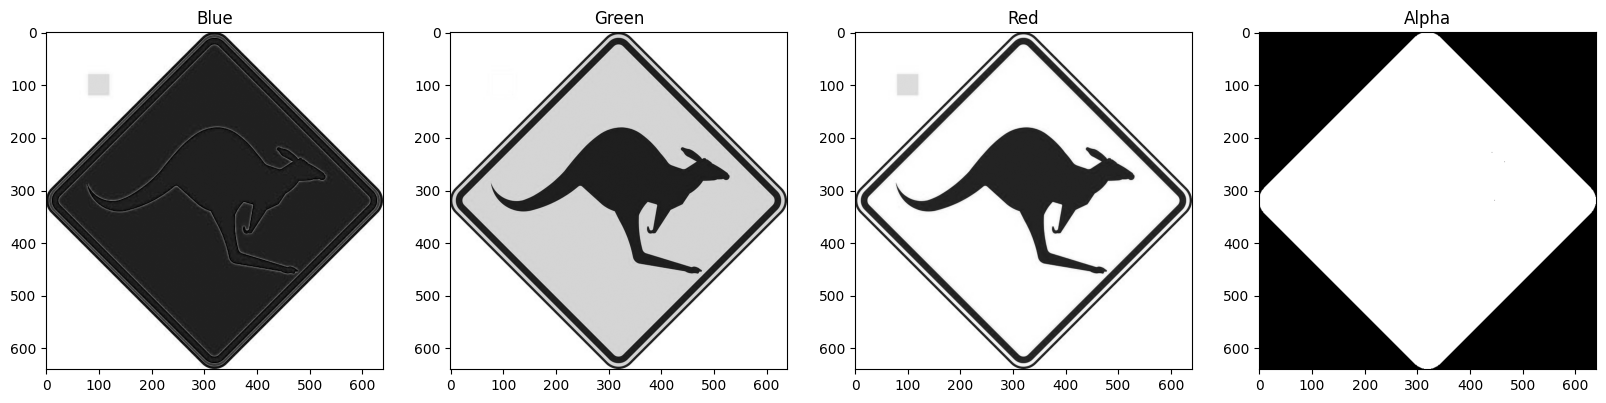

In [8]:
# Read the PNG image using: cv2.IMREAD_UNCHANGED to retain the alpha channel.
img = cv2.imread('kangaroo_alpha_full.png', cv2.IMREAD_UNCHANGED)

# Split the channels.
b, g, r, a = cv2.split(img)

# Display each of the channels.
plt.figure(figsize = (20,15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha');

### <font style="color:rgb(50,120,230)">Semi Transparent Results</font>

Notice that the light green square is still present in the individual color channels of the image. However, the addition of the alpha channel allows the background region of the sign to appear fully transparent. Note that the "green" square in the green channel appears to be absent. This is because the square (which is green) will have a grayscale intensity of 255 in the green channel so it is not possible to view it with a white background.